<a href="https://colab.research.google.com/github/qas95/Machine-Learning/blob/main/MNIST_using_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
import numpy as np
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

In [2]:
(X_train, y_train), (X_val, y_val) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


This is a 5


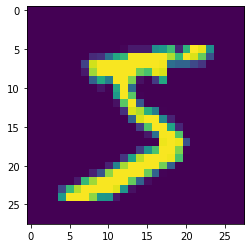

In [3]:
plt.imshow(X_train[0])
print('This is a',y_train[0])
plt.show()

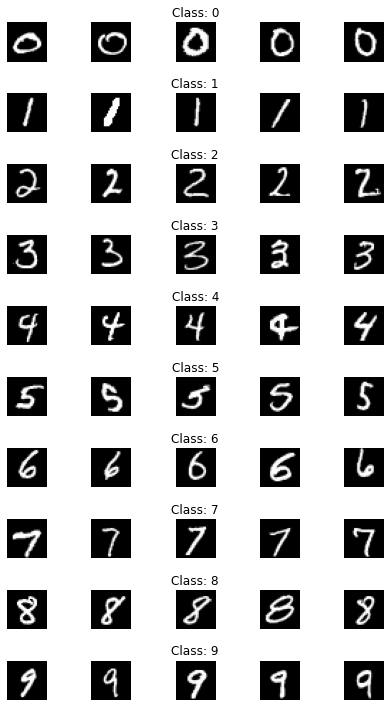

In [4]:
images_per_class = []

cols = 5
classes = 10
fig, axes = plt.subplots(nrows = classes, ncols = cols, figsize = (6,10))
fig.tight_layout()

for i in range(cols):
  for j in range(classes):
    x_selected = X_train[y_train == j]
    axes[j][i].imshow(x_selected[np.random.randint(0,x_selected.shape[0]-1)], cmap = plt.get_cmap('gray'))
    axes[j][i].axis('off')
    
    if i == 2:
      axes[j][i].set_title('Class: '+ str(j))
      images_per_class.append(x_selected.shape[0])


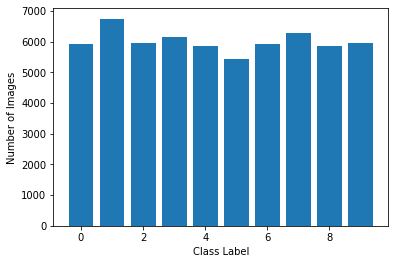

In [5]:
# Checking the number of images per class

plt.bar(list(range(0,classes)), images_per_class)
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.show()

In [6]:
#One Hot Encoding the class labels

y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)

In [7]:
# Normalizing all images on a scale of 0 to 1

X_train = X_train/255
X_val = X_val/255

In [8]:
#Reshaping the input for feeding into the network as a flat 2D array

n_pixels = 784
X_train = X_train.reshape(X_train.shape[0], n_pixels)
X_val = X_val.reshape(X_val.shape[0], n_pixels)

In [9]:
X_train.shape
y_train.shape

(60000, 10)

In [44]:
#MODEL CREATION
adam = Adam(lr = 0.01)
model = Sequential()
model.add(Dense(10, activation='relu', input_dim = 784))
model.add(Dense(10, activation= 'relu'))
model.add(Dense(30, activation= 'relu'))
model.add(Dense(10, activation= 'softmax'))
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                310       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________


In [46]:
X_train.shape

(60000, 784)

In [47]:
h = model.fit(X_train, y_train, verbose = 1, epochs=10, validation_split=0.1, shuffle = True, batch_size=2)

Epoch 1/10
27000/27000 [==============================] - 60s 2ms/step - loss: 1.1869 - accuracy: 0.5728 - val_loss: 0.8258 - val_accuracy: 0.7378
Epoch 2/10
27000/27000 [==============================] - 58s 2ms/step - loss: 0.9524 - accuracy: 0.6809 - val_loss: 0.8101 - val_accuracy: 0.7268
Epoch 3/10
27000/27000 [==============================] - 59s 2ms/step - loss: 0.9694 - accuracy: 0.6729 - val_loss: 0.8962 - val_accuracy: 0.7032
Epoch 4/10
27000/27000 [==============================] - 59s 2ms/step - loss: 1.0659 - accuracy: 0.6274 - val_loss: 1.0941 - val_accuracy: 0.6230
Epoch 5/10
27000/27000 [==============================] - 59s 2ms/step - loss: 1.2472 - accuracy: 0.5366 - val_loss: 1.4143 - val_accuracy: 0.4442
Epoch 6/10
27000/27000 [==============================] - 57s 2ms/step - loss: 1.4424 - accuracy: 0.4456 - val_loss: 1.3005 - val_accuracy: 0.4643
Epoch 7/10
27000/27000 [==============================] - 58s 2ms/step - loss: 1.3548 - accuracy: 0.4595 - val_loss: 1

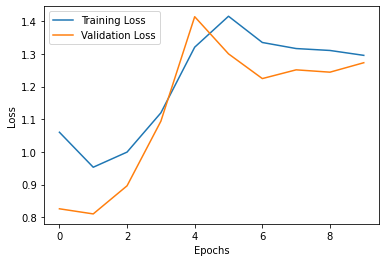

In [48]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

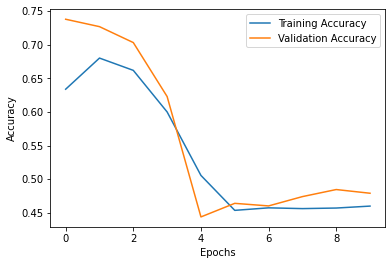

In [49]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

In [50]:
#Evaluate model
score = model.evaluate(X_val, y_val)
print('Error ',score[0])
print('Accuracy ',score[1])

313/313 [==============================] - 1s 2ms/step - loss: 1.3112 - accuracy: 0.4710
Error  1.3111891746520996
Accuracy  0.47099998593330383


In [51]:
import requests
from PIL import Image
import cv2

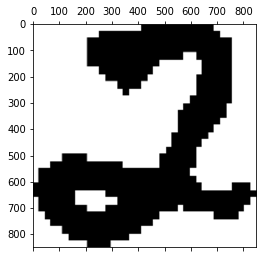

In [52]:
#Testing the model with a new Image from the web
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream = True)

image = Image.open(response.raw)
plt.matshow(image)

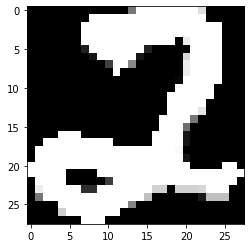

In [53]:
img_array = np.asarray(image)
resize = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY)
#Change background
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap = plt.get_cmap('gray'))

In [54]:
image = image/255
image = image.reshape(1,784)

np.argmax(model.predict(image), axis=-1)

array([6])